In [35]:
import os
import sys
import glob
import scipy
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 100)
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('display.max_columns', 100)

sns.set_palette("Set2")


## Read in information

In [36]:
DATE = '02_04_2020'

PLdb = pd.read_csv('/home/mattolm/user_data/Covid_19/Pipeline/Jupyter/{0}_SRA_parsed_info.csv'.format(DATE))
for c in ['coverage', 'breadth']:
    del PLdb[c]

In [37]:
saveloc = '/home/mattolm/user_data/Covid_19/Pipeline/Jupyter/{0}_tables/'.format(DATE)

COdb = pd.read_csv(saveloc + 'COVID_genome_coverage.csv')
Odb = pd.read_csv(saveloc + 'COVID_positional_coverage_v2.csv')
MGdb = pd.read_csv(saveloc + 'COVID_gene_coverage_v2.csv')
POdb = pd.read_csv('/home/mattolm/user_data/Covid_19/datatables/COVID_genes_positional_v2.2.csv')


In [38]:
save_loc = '/home/mattolm/user_data/Covid_19/Pipeline/Jupyter/{0}_figures/'.format(DATE)
if not os.path.isdir(save_loc):
    os.mkdir(save_loc)

## Make QC figures relating various metadata to things

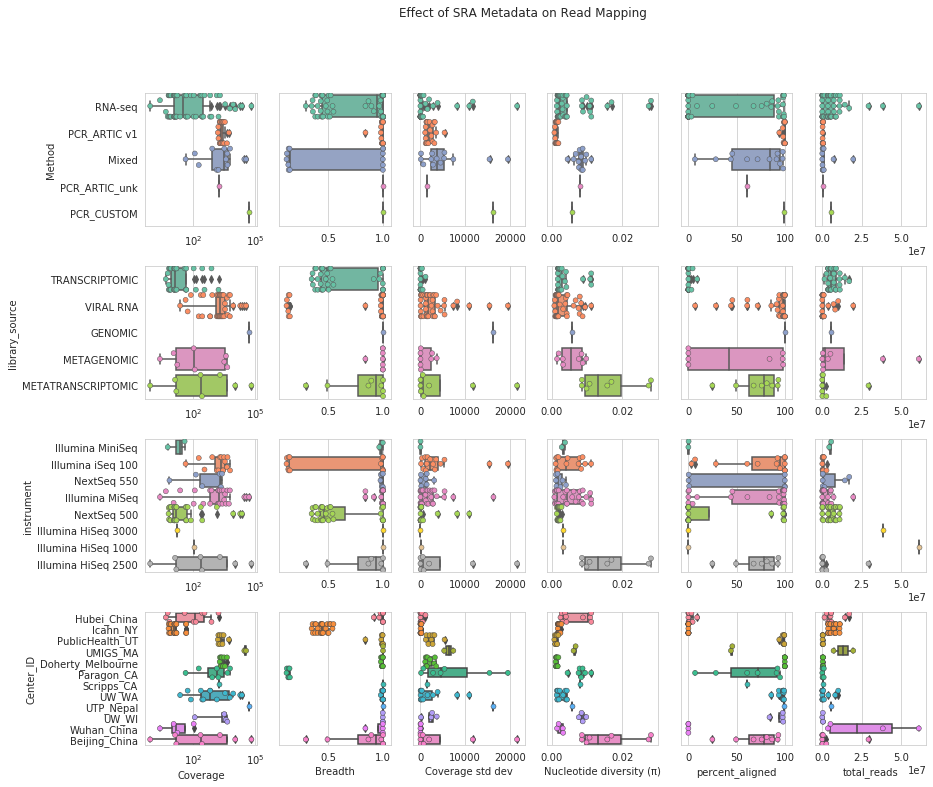

In [45]:
fdb = pd.merge(PLdb, COdb, on='Run')
fdb['mean_microdiversity'] = 1 - fdb['mean_clonality']

m2m = {'coverage':'Coverage', 'breadth':'Breadth', 'std_cov':'Coverage std dev', 'mean_microdiversity':'Nucleotide diversity (π)'}
fdb = fdb.rename(columns=m2m)

sns.set_style('whitegrid')
VARIABLES = ['Method', 'library_source', 'instrument', 'Center_ID']
METRICS = ['Coverage', 'Breadth', 'Coverage std dev', 'Nucleotide diversity (π)', 'percent_aligned', 'total_reads']

fig, axs = plt.subplots(
            len(VARIABLES), len(METRICS), figsize=(14, 12), gridspec_kw={"hspace": 0.3})


for m, met in enumerate(METRICS):
    for v, var in enumerate(VARIABLES):
        ax = axs[v][m]
        g = sns.boxplot(data=fdb, y=var, x=met, ax=ax)
        g = sns.swarmplot(data=fdb, y=var, x=met, ax=ax, linewidth=0.5)
        if m != 0:
            ax.set_ylabel('')
            ax.set_yticks([])
        if v != len(VARIABLES) - 1:
            ax.set_xlabel('')
            #ax.set_yticks([])
        if met in ['Coverage']:
            g.set_xscale("log")
        #plt.xticks(rotation=90)
plt.suptitle('Effect of SRA Metadata on Read Mapping')
plt.gcf().savefig(save_loc + 'QC_boxplots_{0}.png'.format(DATE), bbox_inches='tight', dpi=200)
plt.show()
    

## Look at distributions

In [ ]:
# VARIABLES = ['Center_ID']
# for ORG_BY in VARIABLES:
#     orgs = []
#     org2samples = {}
#     for org, db in PLdb.groupby(ORG_BY):
#         org2samples[org] = db['Run'].tolist()
#         #orgs.append("{0}\n({1} samples)".format(org, len(db)))
#         orgs.append("{0}".format(org, len(db)))

#     Y_LEN = len(PLdb[ORG_BY].unique())
#     X_LEN = max([len(s) for o, s in org2samples.items()])
#     print("{0} by {1}".format(X_LEN, Y_LEN))
#     fig, axs = plt.subplots(X_LEN, Y_LEN, figsize=(20, 10), gridspec_kw={"hspace": 0.6})#, sharex=True, gridspec_kw={"hspace": 0.5})

#     sns.set_style('white')
#     CUR_Y = 0
#     for org, samples in org2samples.items():
#         CUR_X = 0
#         for sample in samples:
#             ax = axs[CUR_X][CUR_Y]
#             Acov = Odb[Odb['Run'] == sample]['coverage']
#             if len(Acov) == 0:
#                 plt.text(0.75, 0.75, sample, ha='center', va='center', transform=ax.transAxes, fontsize=8)
#                 axs[CUR_X, CUR_Y].set_axis_off()
#                 CUR_X += 1
#                 continue
                
#             sns.distplot(Acov, kde=False, ax=ax)
#             #ax.set_xlim(0, max(Acov))
#             ax.set_yticks([])
#             ax.set_xticks([0, int(np.mean([0, max(Acov)])), max(Acov)])
#             ax.tick_params(axis='both', which='major', pad=0, labelsize=8)
#             ax.set_xlabel('')
#             # Hide the right and top spines
#             ax.spines['right'].set_visible(False)
#             ax.spines['top'].set_visible(False)
#             plt.text(0.75, 0.75, sample, ha='center', va='center', transform=ax.transAxes, fontsize=8)
#             CUR_X += 1
        
#         ax.set_xlabel('coverage')
#         while CUR_X < X_LEN:
#             axs[CUR_X, CUR_Y].set_axis_off()
#             CUR_X += 1
#         CUR_Y += 1

#     for ax, col in zip(axs[0], orgs):
#         ax.set_title(col, fontdict={'fontsize': 10})


#     plt.suptitle('Coverage distribution by {0}'.format(ORG_BY))
#     plt.gcf().savefig(save_loc + 'Coverage_distribution_{0}.png'.format(DATE), bbox_inches='tight', dpi=200)
#     plt.show()

In [13]:
# LIM = 0.02
# VARIABLES = ['Center_ID']
# for ORG_BY in VARIABLES:
#     orgs = []
#     org2samples = {}
#     for org, db in PLdb.groupby(ORG_BY):
#         org2samples[org] = db['Run'].tolist()
#         #orgs.append("{0}\n({1} samples)".format(org, len(db)))
#         orgs.append("{0}".format(org, len(db)))

#     Y_LEN = len(PLdb[ORG_BY].unique())
#     X_LEN = max([len(s) for o, s in org2samples.items()])
#     print("{0} by {1}".format(X_LEN, Y_LEN))
#     fig, axs = plt.subplots(X_LEN, Y_LEN, figsize=(20, 10), gridspec_kw={"hspace": 0.6})#, sharex=True, gridspec_kw={"hspace": 0.5})

#     sns.set_style('white')
#     CUR_Y = 0
#     for org, samples in org2samples.items():
#         CUR_X = 0
#         for sample in samples:
#             ax = axs[CUR_X][CUR_Y]
#             Acov = Odb[Odb['Run'] == sample]['microdiversity'].dropna()
#             Acov = Acov[(Acov <= LIM)]
#             if len(Acov) == 0:
#                 plt.text(0.75, 0.75, sample, ha='center', va='center', transform=ax.transAxes, fontsize=8)
#                 axs[CUR_X, CUR_Y].set_axis_off()
#                 CUR_X += 1
#                 continue
            
#             sns.distplot(Acov, kde=False, ax=ax, bins=50, hist_kws={"range": [0, LIM]})
#             ax.set_xlim(0, LIM)
# #             sns.distplot(Acov, kde=False, ax=ax)
# #             ax.set_xlim(0, max(Acov))
#             ax.set_xticks([0, LIM/2, LIM])
#             ax.set_yticks([])
    
#             #ax.set_xticks([0, int(np.mean([0, max(Acov)])), max(Acov)])
#             ax.tick_params(axis='both', which='major', pad=0, labelsize=8)
#             ax.set_xlabel('')
#             # Hide the right and top spines
#             ax.spines['right'].set_visible(False)
#             ax.spines['top'].set_visible(False)
#             plt.text(0.75, 0.75, sample, ha='center', va='center', transform=ax.transAxes, fontsize=8)
#             CUR_X += 1
        
#         ax.set_xlabel('microdiverstiy')
#         while CUR_X < X_LEN:
#             axs[CUR_X, CUR_Y].set_axis_off()
#             CUR_X += 1
#         CUR_Y += 1

#     for ax, col in zip(axs[0], orgs):
#         ax.set_title(col, fontdict={'fontsize': 10})


#     plt.suptitle('Microdiverstiy distribution by {0}'.format(ORG_BY))
#     plt.gcf().savefig(save_loc + 'Microdiversity_distribution_{0}.png'.format(DATE), bbox_inches='tight', dpi=200)
#     plt.show()
    

In [14]:
# LIM = 0.02
# VARIABLES = ['Center_ID']
# for ORG_BY in VARIABLES:
#     orgs = []
#     org2samples = {}
#     for org, db in PLdb.groupby(ORG_BY):
#         org2samples[org] = db['Run'].tolist()
#         #orgs.append("{0}\n({1} samples)".format(org, len(db)))
#         orgs.append("{0}".format(org, len(db)))

#     Y_LEN = len(PLdb[ORG_BY].unique())
#     X_LEN = max([len(s) for o, s in org2samples.items()])
#     print("{0} by {1}".format(X_LEN, Y_LEN))
#     fig, axs = plt.subplots(X_LEN, Y_LEN, figsize=(20, 10), gridspec_kw={"hspace": 0.6})#, sharex=True, gridspec_kw={"hspace": 0.5})

#     sns.set_style('white')
#     CUR_Y = 0
#     for org, samples in org2samples.items():
#         CUR_X = 0
#         for sample in samples:
#             ax = axs[CUR_X][CUR_Y]
#             Acov = Odb[Odb['Run'] == sample]['normalized_microdiversity'].dropna()
#             Acov = Acov[(Acov <= LIM)]
#             if len(Acov) == 0:
#                 plt.text(0.75, 0.75, sample, ha='center', va='center', transform=ax.transAxes, fontsize=8)
#                 axs[CUR_X, CUR_Y].set_axis_off()
#                 CUR_X += 1
#                 continue
            
#             sns.distplot(Acov, kde=False, ax=ax, bins=50, hist_kws={"range": [0, LIM]})
#             ax.set_xlim(0, LIM)
# #             sns.distplot(Acov, kde=False, ax=ax)
# #             ax.set_xlim(0, max(Acov))
#             ax.set_xticks([0, LIM/2, LIM])
#             ax.set_yticks([])
    
#             #ax.set_xticks([0, int(np.mean([0, max(Acov)])), max(Acov)])
#             ax.tick_params(axis='both', which='major', pad=0, labelsize=8)
#             ax.set_xlabel('')
#             # Hide the right and top spines
#             ax.spines['right'].set_visible(False)
#             ax.spines['top'].set_visible(False)
#             plt.text(0.75, 0.75, sample, ha='center', va='center', transform=ax.transAxes, fontsize=8)
#             CUR_X += 1
        
#         ax.set_xlabel('microdiverstiy')
#         while CUR_X < X_LEN:
#             axs[CUR_X, CUR_Y].set_axis_off()
#             CUR_X += 1
#         CUR_Y += 1

#     for ax, col in zip(axs[0], orgs):
#         ax.set_title(col, fontdict={'fontsize': 10})


#     plt.suptitle('Normalized microdiverstiy distribution by {0}'.format(ORG_BY))
#     plt.gcf().savefig(save_loc + 'NomalizedMicrodiversity_distribution_{0}.png'.format(DATE), bbox_inches='tight', dpi=200)
#     plt.show()
    

# Make a set of filtered runs

In [19]:
fdb = pd.merge(Odb, POdb, on='position', how='left').merge(COdb, how='left', on='Run')
FRUNS = set(fdb[(fdb['coverage_y'] >= 50) & (fdb['breadth'] >= 0.9)]['Run'].unique().tolist())
print("{0} Filtered runs".format(len(FRUNS)))

50 Filtered runs


# Positional microdiversity

## 1) QC to show that overall, the third position has higher microdiversity. Also choose a metric

I Think I like normalized_microdiversity

In [20]:
fdb = pd.merge(Odb, POdb, on='position', how='left').merge(COdb, how='left', on='Run')
fdb = fdb[fdb['Run'].isin(FRUNS)]
fdb = fdb[~fdb['orf_position'].isna()]
fdb['orf_position'] = fdb['orf_position'].astype(int)
fdb = fdb.drop_duplicates(subset=['Run', 'position'])

for ON in ['coverage_x', 'microdiversity', 'normalized_microdiversity',	'rarefied_microdiversity',	'normalized_rarefied_microdiversity']:
    print("!!! {0} !!!".format(ON))
    for i, orf1 in enumerate([0, 1, 2]):
        for j, orf2 in enumerate([0, 1, 2]):
            if i >= j:
                continue
            stat, p = scipy.stats.ranksums(fdb[fdb['orf_position'] == orf1][ON].tolist(), fdb[fdb['orf_position'] == orf2][ON].tolist())
            print("{0} vs {1} - p = {2:.2E}".format(orf1 + 1, orf2 + 1, p))
    print()

!!! coverage_x !!!
1 vs 2 - p = 9.91E-01
1 vs 3 - p = 9.52E-01
2 vs 3 - p = 9.61E-01

!!! microdiversity !!!
1 vs 2 - p = 6.33E-04
1 vs 3 - p = 1.14E-37
2 vs 3 - p = 5.75E-21

!!! normalized_microdiversity !!!
1 vs 2 - p = 2.70E-04
1 vs 3 - p = 1.31E-43
2 vs 3 - p = 2.29E-24

!!! rarefied_microdiversity !!!
1 vs 2 - p = 1.09E-01
1 vs 3 - p = 2.16E-04
2 vs 3 - p = 1.22E-02

!!! normalized_rarefied_microdiversity !!!
1 vs 2 - p = 1.11E-01
1 vs 3 - p = 2.38E-04
2 vs 3 - p = 3.96E-02



1 vs 2 - p = 2.70E-04
1 vs 3 - p = 1.31E-43
2 vs 3 - p = 2.29E-24


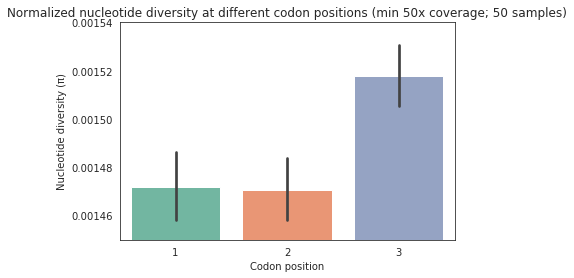

In [24]:
ON = 'normalized_microdiversity'
MIN_COV = 50

fdb = pd.merge(Odb, POdb, on='position', how='left').merge(COdb, how='left', on='Run')
fdb = fdb[fdb['Run'].isin(FRUNS)]
fdb = fdb[~fdb['orf_position'].isna()]
fdb['orf_position'] = fdb['orf_position'].astype(int) + 1
fdb = fdb.drop_duplicates(subset=['Run', 'position'])

sns.barplot(data=fdb, x='orf_position', y=ON)#, ci=None)#, showfliers=False)
plt.ylim(0.00145, 0.00154)
plt.xlabel('Codon position')
plt.ylabel('Nucleotide diversity (π)')

for i, orf1 in enumerate([1, 2, 3]):
    for j, orf2 in enumerate([1, 2, 3]):
        if i >= j:
            continue
        stat, p = scipy.stats.ranksums(fdb[fdb['orf_position'] == orf1][ON].tolist(), fdb[fdb['orf_position'] == orf2][ON].tolist())
        print("{0} vs {1} - p = {2:.2E}".format(orf1, orf2, p))
plt.title('Normalized nucleotide diversity at different codon positions (min {0}x coverage; {1} samples)'.format(MIN_COV, len(fdb['Run'].unique())))
#plt.gcf().savefig(save_loc + 'CodonNormMicrodiversity_min_{0}_v3.png'.format(MIN_COV), bbox_inches='tight', dpi=200)
plt.gcf().savefig(save_loc + 'CodonNormMicrodiversity_min_{0}_{1}.png'.format(MIN_COV, DATE), bbox_inches='tight', dpi=200)

plt.show()

        

## 2) Identify genes with consistantly high / low microdiversity

/home/mattolm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


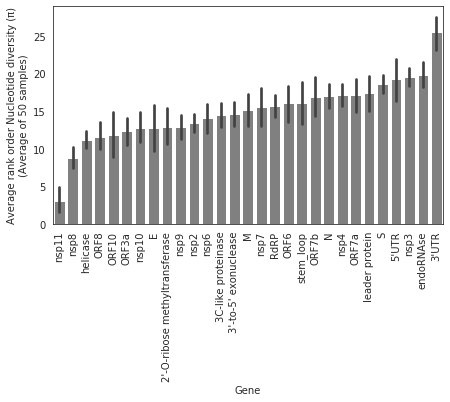

In [25]:
## Plot
fdb = MGdb[MGdb['Run'].isin(FRUNS)]
ITEMS = ['normalized_microdiversity', 'coverage']

g2n = {}
for g, n in dict(POdb.set_index('protein')['protein_name'].to_dict()).items():
    g2n[g] = n
for g, n in dict(POdb.set_index('gene')['gene_name'].to_dict()).items():
    g2n[g] = n

fdb['name'] = fdb['gene'].map(g2n)

# Get the sort order
order = fdb.groupby('name')['normalized_microdiversity_rank'].mean().to_frame().sort_values('normalized_microdiversity_rank').reset_index()['name'].tolist()

# Melt
fdb = fdb.melt(id_vars=['name', 'Run'], value_vars=[i + '_rank' for i in ITEMS])
fdb = fdb[fdb['Run'] != 'all']

# Sort
fdb['name'] = fdb['name'].astype('category')
fdb['name'].cat.reorder_categories(order, inplace=True)
fdb = fdb.sort_values('name')

# Rename
v2v = {'normalized_microdiversity_rank':'Nucleotide diversity (π)', 'coverage_rank':'Coverage'}
fdb['variable'] = fdb['variable'].map(v2v)

# Plot
fdb = fdb[fdb['variable'] == 'Nucleotide diversity (π)']
sns.barplot(data=fdb, x='name', y='value', color='grey')#, ci=None)
plt.xticks(rotation=90)
plt.xlabel('Gene')
plt.ylabel("Average rank order Nucleotide diversity (π)\n(Average of {0} samples)".format(len(fdb['Run'].unique())))
#plt.legend(title='')
plt.gcf().set_size_inches(7, 4)
#plt.gcf().savefig(save_loc + 'GeneMicrodiversity_RankOrder_v2.png'.format(MIN_COV), bbox_inches='tight', dpi=200)
plt.gcf().savefig(save_loc + 'GeneMicrodiversity_RankOrder_{0}.png'.format(DATE), bbox_inches='tight', dpi=200)
plt.show()


# Incorporate interpatient nucleotide diversity

In [26]:
IPdb = pd.read_csv('/home/mattolm/user_data/GitRepos/covid19_population_genomics/data/interpatient/nucleotide_diversity.txt', sep='\t', names=['position', 'diversity'])
IPdb['position'] = IPdb['position'] - 1
IPdb['diversity'].mean()

0.00028213073193101516

In [28]:
ON = 'diversity'

rdb = pd.merge(IPdb, POdb, how='left', on='position')

table = defaultdict(list)
for gene, db in rdb.groupby('protein'):
    #table['Run'].append(run)
    table['gene'].append(gene)
    table[ON].append(db[ON].mean())

for gene, db in rdb.groupby('gene'):
    #table['Run'].append(run)
    table['gene'].append(gene)
    table[ON].append(db[ON].mean())

PGdb = pd.DataFrame(table)
PGdb['{0}_rank'.format(ON)] = PGdb[ON].rank(method='min').astype(int)
PGdb.head()

,gene,diversity,diversity_rank
0,E,0.000249,20
1,M,0.000085,10
2,N,0.000344,23
3,ORF10,0.000851,25
4,ORF3a,0.000244,19


/home/mattolm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


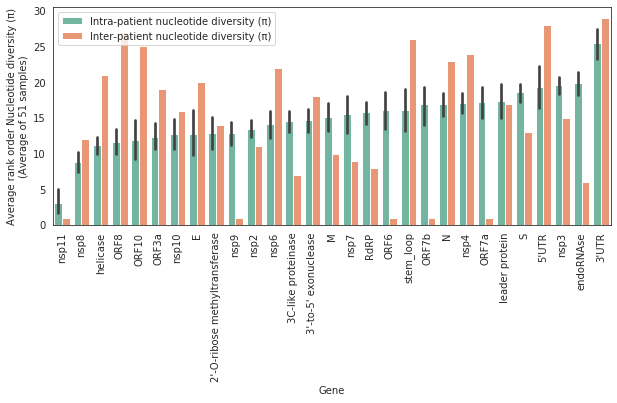

In [29]:
## Plot
fdb = MGdb[MGdb['Run'].isin(FRUNS)]
ITEMS = ['normalized_microdiversity', 'coverage']

g2n = {}
for g, n in dict(POdb.set_index('protein')['protein_name'].to_dict()).items():
    g2n[g] = n
for g, n in dict(POdb.set_index('gene')['gene_name'].to_dict()).items():
    g2n[g] = n

fdb['name'] = fdb['gene'].map(g2n)

# Get the sort order
order = fdb.groupby('name')['normalized_microdiversity_rank'].mean().to_frame().sort_values('normalized_microdiversity_rank').reset_index()['name'].tolist()

# Melt
fdb = fdb.melt(id_vars=['name', 'Run'], value_vars=[i + '_rank' for i in ITEMS])
fdb = fdb[fdb['Run'] != 'all']

# Add interpatient diversity
ffdb = PGdb.copy()
ffdb['name'] = ffdb['gene'].map(g2n)
ffdb['variable'] = 'Inter-patient nucleotide diversity (π)'
ffdb = ffdb[['name', 'variable', 'diversity_rank']].rename(columns={'diversity_rank':'value'})
fdb = pd.concat([fdb, ffdb])

# Sort
fdb['name'] = fdb['name'].astype('category')
fdb['name'].cat.reorder_categories(order, inplace=True)
fdb = fdb.sort_values('name')

# Rename
v2v = {'normalized_microdiversity_rank':'Intra-patient nucleotide diversity (π)', 'coverage_rank':'Coverage', 'Inter-patient nucleotide diversity (π)':'Inter-patient nucleotide diversity (π)'}
fdb['variable'] = fdb['variable'].map(v2v)

# Remove coverage
fdb = fdb[fdb['variable'] != 'Coverage']

# Plot
sns.barplot(data=fdb, x='name', y='value', hue='variable')#, ci=None)
plt.xticks(rotation=90)
plt.xlabel('Gene')
plt.ylabel("Average rank order Nucleotide diversity (π)\n(Average of {0} samples)".format(len(fdb['Run'].unique())))
plt.legend(title='')
plt.gcf().set_size_inches(10, 4)
#plt.gcf().savefig(save_loc + 'GeneMicrodiversity_RankOrder_interIntra_v2.png'.format(MIN_COV), bbox_inches='tight', dpi=200)
plt.gcf().savefig(save_loc + 'GeneMicrodiversity_RankOrder_interIntra_{0}.png'.format(DATE), bbox_inches='tight', dpi=200)
plt.show()


# Scatter plot

## By center ID

4 by 3


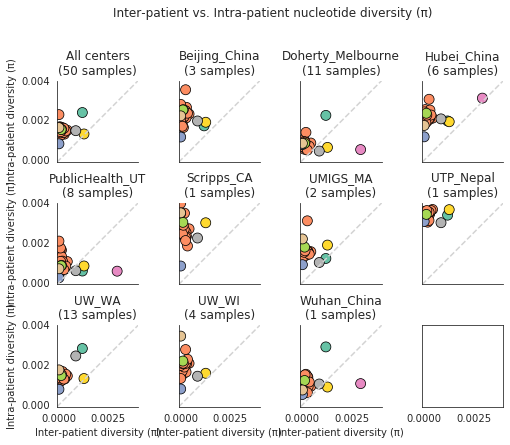

In [30]:
Fdb = MGdb[MGdb['Run'].isin(FRUNS)]
Fdb = Fdb[Fdb['Run'] != 'all']
Fdb = pd.merge(Fdb, PLdb[['Run', 'Center_ID']], on='Run')
Fdb = Fdb[Fdb['Run'].isin(FRUNS)]

LIM = 0.004
NLIM = -0.0001

g2c = {'S':'Spike', 'ORF10':'ORF10', 'ORF8':'ORF8', 'stem_loop':'stem_loop', "YP_009725312.1":'nsp11', 'ORF6':'ORF6', '5\'UTR':'UTR'}


# Set up axes
X_LEN = 3
Y_LEN = int((len(Fdb['Center_ID'].unique()) + 2) / X_LEN)
print("{0} by {1}".format(Y_LEN, X_LEN))
fig, axs = plt.subplots(X_LEN, Y_LEN, sharex=True, sharey=True, figsize=(14, 14), gridspec_kw={"hspace": 0.5, 'wspace':0.5})
plt.gcf().set_size_inches(8, 6)

# Make a list of axes
ax_list = []
for ax in axs:
    for a in ax:
        ax_list.append(a)

# Do the all
ax = ax_list[0]

fdb = Fdb.copy()

# Get average average intra-patient gene diversity
fdb = fdb.groupby('gene')['normalized_microdiversity'].mean().to_frame().reset_index(drop=False).rename(columns={'normalized_microdiversity':'intrapatient_diversity'})

# Get average inter-patient diversity
ffdb = PGdb
ffdb = ffdb[['gene', 'diversity']].rename(columns={'diversity':'interpatient_diversity'})

# Merge
fdb = pd.merge(fdb, ffdb, on='gene', how='outer')

# Re-name
fdb['name'] = fdb['gene'].map(g2c).fillna('other')
fdb = fdb.sort_values('name', ascending=False)

# Plot
sns.scatterplot(data=fdb, x='interpatient_diversity', y='intrapatient_diversity', hue='name', s=100, edgecolor='black', ax=ax)
ax.plot([NLIM,LIM], [NLIM,LIM], c='lightgrey', ls='--')#, ax=ax)#, dpi=200)

ax.set_xlim(NLIM, LIM)
ax.set_ylim(NLIM, LIM)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Inter-patient diversity (π)')
ax.set_ylabel('Intra-patient diversity (π)')

center = 'All centers'
ax.set_title("{0}\n({1} samples)".format(center, len(Fdb['Run'].unique())))

ax.get_legend().remove()

i = 1
for center, fdb in Fdb.groupby('Center_ID'):
    ax = ax_list[i]

    # Get average average intra-patient gene diversity
    fdb = fdb.groupby('gene')['normalized_microdiversity'].mean().to_frame().reset_index(drop=False).rename(columns={'normalized_microdiversity':'intrapatient_diversity'})

    # Get average inter-patient diversity
    ffdb = PGdb
    ffdb = ffdb[['gene', 'diversity']].rename(columns={'diversity':'interpatient_diversity'})

    # Merge
    fdb = pd.merge(fdb, ffdb, on='gene', how='outer')

    # Re-name
    fdb['name'] = fdb['gene'].map(g2c).fillna('other')
    fdb = fdb.sort_values('name', ascending=False)

    # Plot
    sns.scatterplot(data=fdb, x='interpatient_diversity', y='intrapatient_diversity', hue='name', s=100, edgecolor='black', ax=ax)
    ax.plot([NLIM,LIM], [NLIM,LIM], c='lightgrey', ls='--')#, ax=ax)#, dpi=200)

    ax.set_xlim(NLIM, LIM)
    ax.set_ylim(NLIM, LIM)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xlabel('Inter-patient diversity (π)')
    ax.set_ylabel('Intra-patient diversity (π)')
    
    ax.set_title("{0}\n({1} samples)".format(center, len(Fdb[Fdb['Center_ID'] == center]['Run'].unique())))
    
    if i != ((X_LEN * Y_LEN) - 1):
        ax.get_legend().remove()
    else:
        ax.legend(loc='lower center', bbox_to_anchor= (-1.5, -1.5), ncol=5, title='Gene Identity')
    
    i += 1
    
plt.suptitle('Inter-patient vs. Intra-patient nucleotide diversity (π)', y=1.05)
#plt.gcf().savefig(save_loc + 'GeneMicrodiversity_scatter_interIntra_v3.png'.format(MIN_COV), bbox_inches='tight', dpi=200)
plt.gcf().savefig(save_loc + 'GeneMicrodiversity_scatter_interIntra_{0}.png'.format(DATE), bbox_inches='tight', dpi=200)
plt.show()

1 by 11


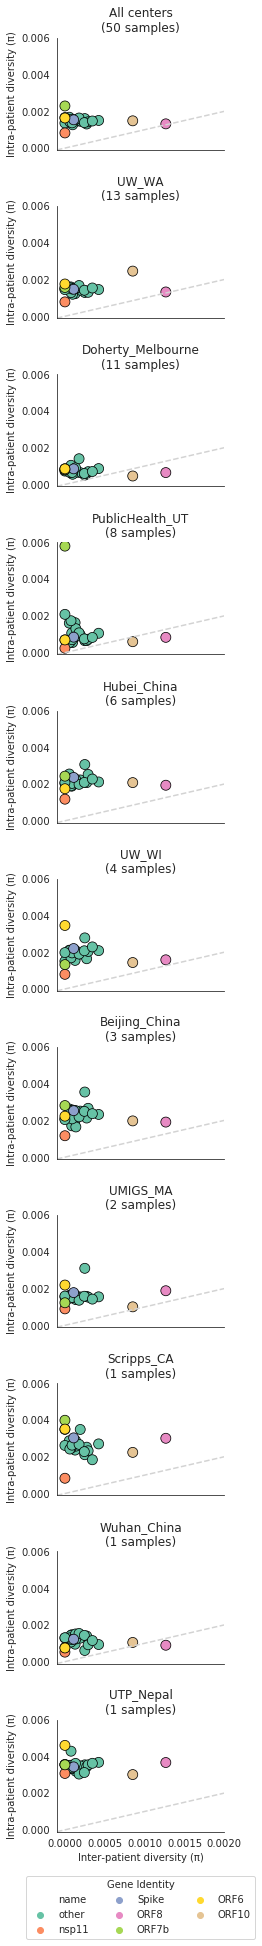

In [31]:
def miniplot(fdb, PGdb, g2c, ax, XLIM, XNLIM, YLIM, YNLIM, center, rm_legend=True):
    samples = len(fdb['Run'].unique())
    
    # Get average average intra-patient gene diversity
    fdb = fdb.groupby('gene')['normalized_microdiversity'].mean().to_frame().reset_index(drop=False).rename(columns={'normalized_microdiversity':'intrapatient_diversity'})

    # Get average inter-patient diversity
    ffdb = PGdb
    ffdb = ffdb[['gene', 'diversity']].rename(columns={'diversity':'interpatient_diversity'})

    # Merge
    fdb = pd.merge(fdb, ffdb, on='gene', how='outer')

    # Re-name
    fdb['name'] = fdb['gene'].map(g2c).fillna('other')
    fdb = fdb.sort_values('name', ascending=False)

    # Plot
    sns.scatterplot(data=fdb, x='interpatient_diversity', y='intrapatient_diversity', hue='name', s=100, edgecolor='black', ax=ax)
    ax.plot([NLIM,LIM], [NLIM,LIM], c='lightgrey', ls='--')#, ax=ax)#, dpi=200)

    ax.set_xlim(XNLIM, XLIM)
    ax.set_ylim(YNLIM, YLIM)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xlabel('Inter-patient diversity (π)')
    ax.set_ylabel('Intra-patient diversity (π)')

    ax.set_title("{0}\n({1} samples)".format(center, samples))

    if rm_legend:
        ax.get_legend().remove()

# Set up input dataframe
Fdb = MGdb[MGdb['Run'].isin(FRUNS)]
IGNORE = ['stem_loop', '5\'UTR', '3\'UTR']
Fdb = Fdb[~Fdb['gene'].isin(IGNORE)]

Fdb = Fdb[Fdb['Run'] != 'all']
Fdb = pd.merge(Fdb, PLdb[['Run', 'Center_ID']], on='Run')

# Set up limits
XLIM = 0.002
XNLIM = -0.0001

YLIM = 0.006
YNLIM = -0.0001

g2c = {'S':'Spike', 'ORF10':'ORF10', 'ORF8':'ORF8', 'stem_loop':'stem_loop', "YP_009725312.1":'nsp11', 'ORF6':'ORF6', '5\'UTR':'UTR'}
g2c = {'S':'Spike', 'ORF10':'ORF10', 'ORF8':'ORF8', 'ORF7b':'ORF7b', "YP_009725312.1":'nsp11', 'ORF6':'ORF6'}



# Set up axes and figure
Y_LEN = 1
X_LEN = int((len(Fdb['Center_ID'].unique()) + 1) / Y_LEN)

X_FIG_LEN = 3
Y_FIG_LEN = (X_FIG_LEN * (len(Fdb['Center_ID'].unique()) + 1))

print("{0} by {1}".format(Y_LEN, X_LEN))
fig, axs = plt.subplots(X_LEN, Y_LEN, sharex=True, sharey=True, figsize=(X_FIG_LEN, Y_FIG_LEN), gridspec_kw={"hspace": 0.5, 'wspace':0.5})
ax_list = []
for ax in axs:
    try:
        for a in ax:
            ax_list.append(a)
    except:
        ax_list.append(ax)

# Do the centers
ax = ax_list[0]
miniplot(Fdb.copy(), PGdb, g2c, ax, XLIM, XNLIM, YLIM, YNLIM, 'All centers', rm_legend=True)

# Do the rest of centers
i = 1
order = list(Fdb.drop_duplicates(subset='Run')['Center_ID'].value_counts().index)
for center in order:
    fdb = Fdb[Fdb['Center_ID'] == center]
    ax = ax_list[i]
    
    if i != ((X_LEN * Y_LEN) - 1):
        miniplot(fdb, PGdb, g2c, ax, XLIM, XNLIM, YLIM, YNLIM, center, rm_legend=True)
    else:
        miniplot(fdb, PGdb, g2c, ax, XLIM, XNLIM, YLIM, YNLIM, center, rm_legend=False)
        ax.legend(loc='lower center', ncol=3, title='Gene Identity', bbox_to_anchor= (0.5, -1))
    
    i += 1
    
#plt.suptitle('Inter-patient vs. Intra-patient nucleotide diversity (π)', y=1.05)
#plt.gcf().savefig(save_loc + 'GeneMicrodiversity_scatter_interIntra_v3.png'.format(MIN_COV), bbox_inches='tight', dpi=200)
#plt.gcf().savefig(save_loc + 'GeneMicrodiversity_scatter_interIntra_{0}.png'.format(DATE), bbox_inches='tight', dpi=200)
plt.show()